# <span style=color:white>FOUNDATION FOR INFERENCE</span>

<div class="alert alert-warning alert-warning"><b><u>Statistical Inference</u></b>   

<b><u>Statistical inference</u></b> is concerned primarily with understanding the <i><u>quality of parameter estimates</u></i>.   
$%$   
For example, a <span style=color:blue>classic inferential</span> question is :   

<span style=color:blue><i>“How sure are we that the estimated mean, $\bar{x}$, is near the true population mean, $\mu$ ?”</i></span>   
$%$   
While the equations and details change depending on the setting, the foundations for inference are the same throughout all of statistics.
</div>

<span style=color:white><b><u>Youth Risk Behavior Surveillance System (YRBSS) Dataset</u></b></span>

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

In [3]:
data = 'yrbss.csv'
yrbss = pd.read_csv(data,";")

In [4]:
yrbss

,Unnamed: 0,age,gender,grade,hispanic,race,height,weight,helmet_12m,text_while_driving_30d,physically_active_7d,hours_tv_per_school_day,strength_training_7d,school_night_hours_sleep
0,5653,16.0,female,11.0,not,Black or African American,"1,5","52,62",never,1-2,0,4,0,8
1,9437,17.0,male,11.0,not,White,"1,78","74,84",rarely,0,7,1,5,7
2,2021,17.0,male,11.0,not,White,"1,75","106,6",never,0,7,2,0,7
3,12187,15.0,male,10.0,hispanic,NaN,"1,68","66,68",never,did not drive,3,2,1,5
4,1690,18.0,male,12.0,not,Black or African American,"1,7","80,29",never,did not drive,0,2,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5313,17.0,male,11.0,not,White,"1,8","63,5",always,0,2,do not watch,0,7
96,8600,16.0,female,10.0,not,White,"1,63","49,9",did not ride,0,0,1,0,6
97,12185,15.0,male,10.0,not,Black or African American,"1,78","79,38",never,0,6,3,5,7
98,3111,15.0,male,9.0,not,White,"1,68","58,97",never,1-2,7,5+,1,6


In [5]:
yrbss.head()

,Unnamed: 0,age,gender,grade,hispanic,race,height,weight,helmet_12m,text_while_driving_30d,physically_active_7d,hours_tv_per_school_day,strength_training_7d,school_night_hours_sleep
0,5653,16.0,female,11.0,not,Black or African American,"1,5","52,62",never,1-2,0,4,0,8
1,9437,17.0,male,11.0,not,White,"1,78","74,84",rarely,0,7,1,5,7
2,2021,17.0,male,11.0,not,White,"1,75","106,6",never,0,7,2,0,7
3,12187,15.0,male,10.0,hispanic,NaN,"1,68","66,68",never,did not drive,3,2,1,5
4,1690,18.0,male,12.0,not,Black or African American,"1,7","80,29",never,did not drive,0,2,2,6


In [6]:
yrbss.columns

Index(['Unnamed: 0', 'age', 'gender', 'grade', 'hispanic', 'race', 'height',
       'weight', 'helmet_12m', 'text_while_driving_30d',
       'physically_active_7d', 'hours_tv_per_school_day',
       'strength_training_7d', 'school_night_hours_sleep'],
      dtype='object')

In [7]:
yrbss.describe().round(3)

,Unnamed: 0,age,grade,physically_active_7d,strength_training_7d
count,100.000,99.000,99.000,100.000,100.000
mean,6136.870,16.162,10.455,3.750,2.780
std,3803.101,1.175,1.100,2.556,2.576
min,129.000,14.000,9.000,0.000,0.000
25%,2484.500,15.000,9.500,1.750,0.000
50%,5884.500,16.000,10.000,4.000,2.500
75%,9473.750,17.000,11.000,7.000,5.000
max,13582.000,18.000,12.000,7.000,7.000


In [8]:
heights = []
weights = []
for height in yrbss.height.values:
    heights.append(float(height.replace(",",".")))
for weight in yrbss.weight.values:
    weights.append(float(weight.replace(",",".")))

yrbss["heights"] = heights
yrbss["weights"] = weights

## <span style=color:darkgreen>VARIABILITY IN ESTIMATES</span> 

### <span style=color:darkred>Point Estimate</span>

We want to estimate the <span style=color:blue><b>population mean ( $\mu$ )</b></span> based on the <span style=color:blue><b>sample</b></span>.   

The most intuitive way to go about doing this is to simply take the <span style=color:blue><b>sample mean</b></span>.

For instance to <span style=color:blue>estimate the average</span> height of all YRBSS students, take the average height for the <span style=color:blue><b>sample.</b></span>

\begin{align*}\bar{x}_{height}\hspace{2mm}=\hspace{2mm}\frac{1.50 + 1.78 + · · · + 1.70}{100}\hspace{2mm}= 1.697\end{align*}

or we could used the python's <span style=color:blue>describe() method</span> :

In [9]:
yrbss_s = yrbss.sample(frac=0.5)

In [10]:
yrbss_s.describe().round(3)

,Unnamed: 0,age,grade,physically_active_7d,strength_training_7d,heights,weights
count,50.000,49.000,49.000,50.000,50.000,50.000,50.000
mean,5694.760,16.061,10.347,3.900,2.860,1.701,73.292
std,3698.916,1.215,1.147,2.367,2.382,0.087,15.601
min,764.000,14.000,9.000,0.000,0.000,1.500,52.620
25%,2189.500,15.000,9.000,2.000,0.000,1.635,61.580
50%,5000.000,16.000,10.000,4.000,3.000,1.715,69.355
75%,8472.250,17.000,11.000,6.000,5.000,1.772,81.083
max,13416.000,18.000,12.000,7.000,7.000,1.850,124.740


The <span style=color:blue>sample mean</span> <b>$\bar{x} = 1.697$</b> meters is called a <span style=color:blue><b>point estimate</b></span> of the <span style=color:blue>population mean</span>: if we can only choose one value to estimate the <span style=color:blue>population mean</span>, this is our best guess.

Suppose we take a <b>NEW</b> <span style=color:blue>sample</span> of <b>100 people</b> and recompute the <span style=color:blue>mean</span>;   

We will not get the <i><b>exact same answer</b></i> that we got using the <b>yrbss_samp</b> dataset. The reason is that <span style=color:blue><u>estimates</u></span> generally vary from one sample to another, and this <span style=color:blue><u><b>sampling variation</b></u></span> suggests our estimate may be close, but it <i><b>will not be exactly equal to the parameter</b></i>.

We can also estimate the <span style=color:blue>average</span> <b>weight</b> of $YRBSS$ respondents by examining the <span style=color:blue>sample mean</span> of <b>weight (in kg)</b>, and <span style=color:blue>average</span> <b>number of days physically active in a week</b> :

\begin{align*}\bar{x}_{weight} = \frac{52.6 + 74.8 + · · · + 55.8}{100} = 68.89\:Kg\hspace{2mm}or\hspace{2mm}151.6\hspace{2mm}pounds\end{align*}

\begin{align*}\bar{x}_{active} = \frac{0 + 7+· · · + 1}{100} = 3.75\end{align*}

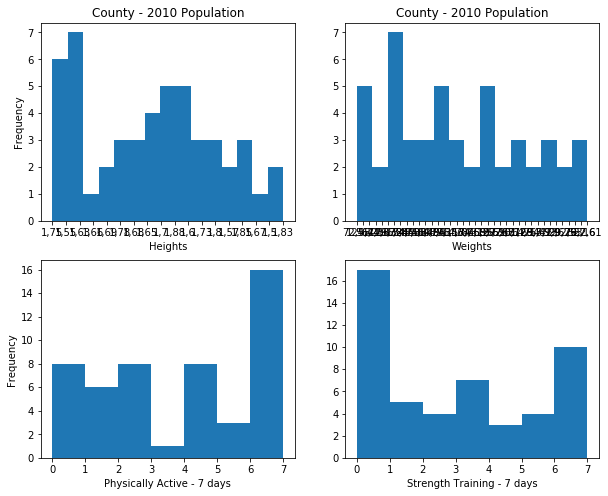

In [12]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2, 2, 1)

### Figures and Subplots
# fig = plt.figure()

ax1.hist(yrbss_s['height'], bins=15)
plt.title('County - 2010 Population')
plt.ylabel('Frequency')
plt.xlabel('Heights')

ax2 = fig.add_subplot(2, 2, 2)

ax2.hist(yrbss_s['weight'], bins=15)
plt.title('County - 2010 Population')
plt.xlabel('Weights')

ax3 = fig.add_subplot(2, 2, 3)

ax3.hist(yrbss_s['physically_active_7d'], bins=7)
plt.xlabel('Physically Active - 7 days')
plt.ylabel('Frequency')

ax4 = fig.add_subplot(2, 2, 4)

ax4.hist(yrbss_s['strength_training_7d'], bins=7)
plt.xlabel('Strength Training - 7 days')

plt.show()

What about generating <span style=color:blue>point estimates</span> of other <span style=color:blue><b>population parameters</b></span>, such as
the <span style=color:blue><i>population median</i></span> or <span style=color:blue><i>population standard deviation</i></span>? Once again we might <span style=color:blue><b>estimate parameters</b></span> based on <span style=color:blue><b>sample statistics</b></span>. 
    
For example, the <span style=color:blue>population standard deviation</span> of active using the <span style=color:blue>sample standard deviation</span>, <b>2.56 days</b>.

In [13]:
# Standard deviations from estimate parameter 'physically_active_7d' and sample statistic 
print(yrbss['physically_active_7d'].std())

print(yrbss_s['physically_active_7d'].std())

2.5559398042262815
2.610809554642438


<span style=color:red><b><u>EXERCISE - 6.1</u></b></span>

Suppose we want to estimate the <b><i>difference in days active</i></b> for <span style=color:blue>man and woman</span>.  If $\bar{x}_{men}$ = 4.3 and $\bar{x}_{women}$ = 3.2, then what would be a good <span style=color:blue>point estimate</span> for the <span style=color:blue><b><u>population - $\mu$</u></b></span> difference?

In [14]:
# isolate two variable of interest 'gender' and 'physically_active_7d'
df1 = yrbss_s.loc[:, ["gender",'physically_active_7d']]
df1.head()

,gender,physically_active_7d
88,male,7
92,male,0
67,female,4
71,female,2
80,female,2


In [15]:
df2 = df1.groupby('gender').mean()
df2

,physically_active_7d
gender,
female,2.896552
male,4.571429


<span style=color:green><b><u>SOLUTION - 6.1</u></b></span>

We could take the difference of the two <span style=color:blue>sample means</span>: <b>4.3 - 3.2 = 1.1</b>. Men are physically active about <b>1.1 days per week</b> more than women on average in YRBSS.

In [16]:
# Add a Diff's row level, with the resulting value of substract male vs female mean
df2.loc['Diff'] = df2.loc['male'] - df2.loc['female']
df2

,physically_active_7d
gender,
female,2.896552
male,4.571429
Diff,1.674877


<span style=color:red><b><u>EXERCISE - 6.2<u></b></span>

If you had to provide a <span style=color:blue>point estimate</span> of the <span style=color:blue><b><u>population - $\mu$</u></b></span> $IQR$ for the heights of participants, how might you make such an estimate using a <span style=color:blue>sample</span> ?

<span style=color:green><b><u>SOLUTION - 6.2</u></b></span>

To obtain a <span style=color:blue>point estimate</span> of the <span style=color:blue>height</span> for the <b>full set of $YRBSS$ students</b> ( <span style=color:blue>population $\sigma$ )</span>, we could take the <span style=color:blue><b><u>IQR of the sample</u></b></span>.

In [17]:
# checking the median and mean from "physically_active_7d"
print(np.median(df2["physically_active_7d"].values))

print(np.mean(df2["physically_active_7d"].values))

2.896551724137931
3.0476190476190474


In [18]:
df2.describe().round(3)

,physically_active_7d
count,3.000
mean,3.048
std,1.454
min,1.675
25%,2.286
50%,2.897
75%,3.734
max,4.571


In [19]:
# isolating the sample statistics of interest into diff variables
Q1, Median, Q3 = df2.physically_active_7d.quantile([0.25,0.5,0.75])
round(Q1, ndigits=2), Median, round(Q3, ndigits=2)

(2.29, 2.896551724137931, 3.73)

In [20]:
IRQ = Q3 - Q1
round(IRQ, ndigits=2)

1.45

<div class="alert alert-warning alert-warning"><b><u>Running Mean</u></b>   

<b>Point estimates</b> are not exact, but they get better as more data become available. 

A <b><u>Running Mean</u></b> is a sequence of <b>means</b>, where each <b>mean</b> uses one more observation in its calculation than the <b>mean</b> directly before it in the sequence.
</div>

For example, 

The second <b><i>mean</i></b> in the sequence is the <b><i>average</i></b> of the first two observations and the third in the sequence is the <b><i>average</i></b> of the first three. The <span style=color:blue>running mean</span> for the $active$ variable in the <b><i>yrbss_samp</i></b> approaches the <b><u>true</u></b> <span style=color:blue>population average</span>, <b>3.90 days</b>, as more data become available.

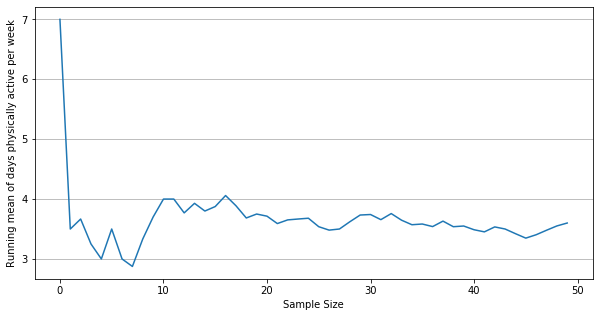

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams

var = (yrbss_s.physically_active_7d)
data = []
for i in range(var.size):
    data.append(var[:i + 1].mean())
    
rcParams['figure.figsize'] = 10, 5 # matplotlib parameters
plt.gca().yaxis.grid(True)
plt.xlabel("Sample Size")
plt.ylabel("Running mean of days physically active per week")

plt.plot(data)
plt.show()

<span style=color:blue><b>Sample point estimates</b></span> only approximate the <span style=color:blue>population parameter</span>, and they vary from one <span style=color:blue><b>sample</b></span> to another.

If we take another <span style=color:blue>simple random sample</span> of the $YRBSS$ students dataset, we will find that the <span style=color:blue>sample mean</span> for the $number\:of\:days\:active$ will be a little different. 

It will be useful to <span style=color:blue>quantify how <b>variable an estimate</b> is from one <b>sample</b> to another</span>. 

- If the <span style=color:blue><b>variability</b></span> is <b><u>small</u></b>, <i>(in other words, the <span style=color:blue>sample mean</span> <b>doesn’t</b> change much from one <span style=color:blue>sample</span> to another)</i>, then that <b>estimate</b> is probably <span style=color:blue><b><u>very accurate</u></b></span>.   
$%$   
- However, If it <span style=color:blue>varies widely</span> from one <span style=color:blue>sample</span> to another, then we <b>will not expect</b> our <b>estimate</b> to be <span style=color:blue><b><u>very good</u></b></span>.

## <span style=color:darkgreen>STANDARD ERROR of the MEAN</span> 

### <span style=color:darkred>Sampling Distribution</span> 

<div class="alert alert-warning alert-warning"><b><u>Sampling Distribution</u></b>   

The <b><u>Sampling Distribution</u></b> represents the <b>distribution</b> of the <b><i><u>point estimates</u></i></b> based on <b>samples</b> of a fixed size from a certain <b>population</b>.   
$%$   
It is useful to think of a particular <b>point estimate</b> as being drawn from such a distribution.   
$%$   
Understanding the concept of a <b><u>Sampling Distribution</u></b> is central to understanding <b><u>statistical inference</u></b>.
</div>

In [22]:
yrbss_s.physically_active_7d.describe().round(2)

count    50.00
mean      3.60
std       2.61
min       0.00
25%       1.00
50%       4.00
75%       6.00
max       7.00
Name: physically_active_7d, dtype: float64

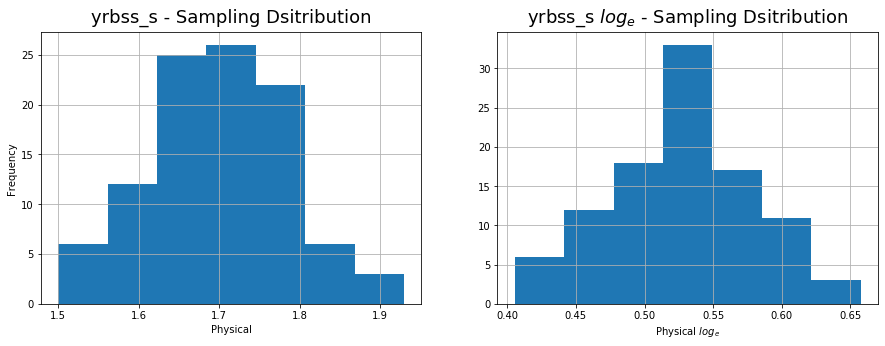

In [23]:
fig = plt.figure(figsize=(15,5))
matplotlib.rc('axes',grid = True)

ax1 = fig.add_subplot(1, 2, 1)

ax1.hist(yrbss["heights"], bins=7)
plt.title('yrbss_s - Sampling Dsitribution', fontsize = 18, pad=10.0)
plt.ylabel('Frequency')
plt.xlabel('Physical')

ax2 = fig.add_subplot(1, 2, 2)

#ax2.np.log(data1).plot.hist(bins=7)
ax2.hist(np.log(yrbss["heights"]), bins=7)
plt.title('yrbss_s $log_e$ - Sampling Dsitribution', fontsize = 18, pad=10.0)
plt.xlabel('Physical $log_e$')

plt.show()

The <span style=color:blue>Sampling Distribution</span> shown above is <span style=color:blue><b>Unimodal</b></span> and approximately <span style=color:blue><b>Symmetric</b></span>. It is also centered exactly at the true population mean: $\mu$ = $3.90$. Intuitively, this makes sense. The <span style=color:blue><b>sample means</b></span> should tend to <b><u>“fall around”</u></b> the <span style=color:blue><b>population mean</b></span>.

In [24]:
yrbss["heights"].describe().round(2)

count    100.00
mean       1.70
std        0.09
min        1.50
25%        1.63
50%        1.70
75%        1.75
max        1.93
Name: heights, dtype: float64

### <span style=color:darkred>Verify our Distribution is Fairly Normal with a Probability Plot</span>  

suggests the distribution of <span style=color:blue>physically_active_7d</span> of YRBSS  is well approximated
by the normal model. We are interested in proceeding under the <span style=color:blue>assumption</span> that the data are <span style=color:blue><b>normally distributed</b></span>, but <u>first we must check to see if this is reasonable</u>.

There are two visual methods for checking the assumption of normality, which can be implemented and interpreted quickly :   

1. The first is a <span style=color:blue>simple histogram</span> with the <span style=color:blue>best fitting normal curve</span> overlaid on the plot, The <span style=color:blue>sample mean $\bar x$</span> and <span style=color:blue>standard deviation $s$</span> are used as the <b>parameters</b> of the <span style=color:blue>best fitting normal curve</span>. The <i>closer this curve fits the histogram</i>, the <i>more reasonable the normal model assumption</i>.   
$\thinspace$
2. Another more common method is examining a <span style=color:blue>Normal Probability Plot</span>. The closer the points are to a *perfect straight line*, the more confident we can be that the data follow the normal model.

Text(0.5, 1.0, 'yrbss_s - Probability QQ Plot')

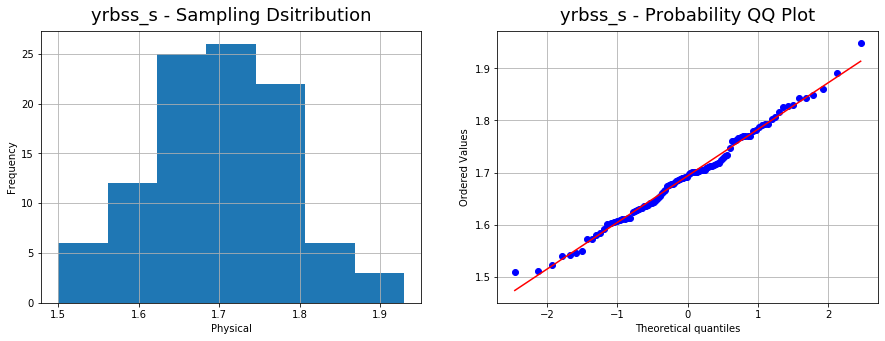

In [25]:
import scipy.stats as stats
fig = plt.figure(figsize=(15,5))

ax5 = fig.add_subplot(1, 2, 1)

ax5.hist(yrbss["heights"], bins=7)
plt.title('yrbss_s - Sampling Dsitribution', fontsize = 18, pad=10.0)
plt.ylabel('Frequency')
plt.xlabel('Physical')

ax6 = fig.add_subplot(1, 2, 2)

mu = yrbss["heights"].mean()
sigma = yrbss["heights"].std()
nsample = len(yrbss["heights"])

Qqx = stats.norm.rvs(loc=mu, scale=sigma, size=nsample)
res = stats.probplot(Qqx, plot=plt)
plt.title('yrbss_s - Probability QQ Plot', fontsize = 18, pad=10.0)


The <span style=color:blue>blue dots</span> are the <b>values</b> from <b>data1</b>.

<span style=color:blue><b><i>So what is the red line ?</i></b></span>

Well, that's our perfect <span style=color:blue>normal distribution</span> that takes our <span style=color:blue><b>median</b></span> of <span style=color:blue><b>data1</b></span> values, <b>3.97</b>, and its <span style=color:blue><b>standard deviation</b></span> of <b>0.29</b>, and plots that, as a perfect <span style=color:blue>normal distribution</span>.   

Let's add the approximate red-line ordered values for each standard deviation to our table <b>data1</b>.

In [26]:
yrbss['Qqx']=Qqx

In [27]:
yrbss[["Qqx","height"]].head().round(2)

,Qqx,height
0,1.77,"1,5"
1,1.77,"1,78"
2,1.58,"1,75"
3,1.68,"1,68"
4,1.54,"1,7"


Text(0.5, 0, 'Qqx')

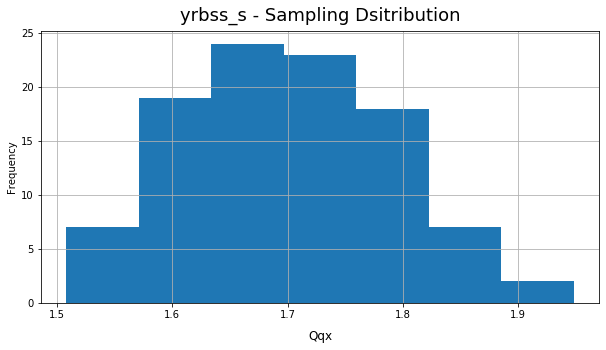

In [28]:
plt.hist(yrbss['Qqx'], bins=7)
plt.title('yrbss_s - Sampling Dsitribution', fontsize = 18, pad=10.0)
plt.ylabel('Frequency')
plt.xlabel('Qqx', fontsize=12 ,labelpad=10.0)

In [29]:
Qqx.mean().round(2), data1.mean().round(2), data1.std().round(2)

NameError: name 'data1' is not defined

In [ ]:
data1.median().round(2), data1.mean().round(2), data1.std().round(2)

### <span style=color:darkred>Standard Error (SE) of an estimate</span> 

<div class="alert alert-warning alert-warning"><b><u>Standard Error (SE) of an estimate
</u></b>   
$%$   

The <b>standard deviation</b> associated with an <i>estimate</i> is called the <b><u>standard error</u></b>. It describes the <b>typical error</b> or <b>uncertainty</b> associated with the estimate.

</div>

When considering the case of the <span style=color:blue><b>point estimate $\bar{x}$</b></span>, there is one problem : 

there is <span style=color:red>no obvious</span> way to estimate its <span style=color:blue><b><u>standard error (SE)</u></b></span> from a single <span style=color:blue><b><u>sample</u></b></span>. However, statistical theory provides a helpful tool to address this issue.

<div class="alert alert-warning alert-warning"><b><u>Computing SE for the sample mean</u></b>   
$%$   

Given $n$ <b>independent observations</b> from a <b>population</b> with <b>standard deviation</b> $\sigma$, the <b>standard error</b> of the <b>sample mean</b> is equal to :   
$%$   

\begin{align*}SE\hspace{1mm}=\hspace{1mm}\frac{\sigma}{\sqrt{n}}\end{align*}   
$%$   
<i>A reliable method to <b>ensure sample observations are independent</b> is to conduct a <b>simple random sample</b> consisting of <b>less</b> than $10$% of the <b>population.</b></i>
</div>

We can see that the <span style=color:blue>sample mean</span> has some <span style=color:blue>variability</span> around the <span style=color:blue><b><u>population mean</u></b></span>, which can be quantified using the <span style=color:blue>standard deviation</span> of this distribution of <span style=color:blue>sample means</span>: $\sigma_{x}$ = $0.26$.

The <span style=color:blue>standard deviation</span> of the <span style=color:blue>sample mean</span> tells us <b><i>how far</i></b> the typical point estimate is away from the actual <span style=color:blue><b><u>population mean</u></b></span>, $3.90$ days.   

It also describes the <span style=color:blue><b><u>typical error of the point estimate</u></b></span>, so we call this <span style=color:blue>standard deviation</span> the <span style=color:blue><b><u>standard error (SE)</u></b></span> of the estimate.

In the <span style=color:blue>sample</span> of $100$ students, the <span style=color:blue>standard error (SE)</span> of the <span style=color:blue>sample mean</span> is equal to the <span style=color:blue><b><u>Population</u></b> Standard Deviation</span> <b>divided</b> by the <span style=color:blue>square root of the <b><u>sample size</u></b></span>:


\begin{align*}SE_\bar{x}\hspace{1mm}=\hspace{1mm}\sigma_\bar{x}\hspace{1mm}=\hspace{1mm}\frac{\sigma_{x}}{\sqrt{n}}\hspace{1mm} =\hspace{1mm}\frac{2.6}{\sqrt{100}}\hspace{1mm}=\hspace{1mm}0.26\end{align*}   
$%$
where <span style=color:blue>$\sigma_{x}$</span> is the <span style=color:blue>standard deviation</span> of the <span style=color:blue>individual <u>observations</u></span>. 

<div class="alert alert-warning alert-danger">There is one subtle issue in <b>$SE$</b> Equation : 

The <b>Population Standard Deviation</b> is typically <b>UNKNOWN</b>. We can use the <b>point estimate</b> of the <b>Standard Deviation</b> from the <b><u>sample</u></b>.   
$%$   
This <b>estimate</b> tends to be sufficiently good when the <b>sample size</b> is at <b>least 30</b> and the <b>Population Distribution</b> is <b><u>not strongly skewed</u></b>. Thus, we often just use the <b>Sample Standard Deviation</b> <span style=color:blue><b>$s$</b></span> instead of <span style=color:blue><b>$\sigma$</b></span>.   
$%$   
When the <b>sample size</b> is <b><u>smaller than 30</u></b>, we will need to use a method to account for <span style=color:blue>extra uncertainty</span> in the <b>standard error - $SE$</b>. If the <b>skew condition</b> is <b>not met</b>, a larger <b>sample</b> is needed to <b>compensate</b> for the <u><b>extra skew</b></u>.
</div>

<span style=color:red><b><u>EXERCISE - 6.3</u></b></span>

1. Would you rather use a <span style=color:blue>small sample</span> or a <span style=color:blue>large sample</span> when estimating a <span style=color:blue>parameter</span>? Why?   
$%$   
2. Using your reasoning from (1), would you expect a <span style=color:blue>point estimate</span> based on a <span style=color:blue>small sample</span> to have <span style=color:blue>smaller</span> or <span style=color:blue>larger standard error</span> than a <span style=color:blue>point estimate</span> based on a <span style=color:blue>larger sample</span>?

<span style=color:green><b><u>SOLUTION - 6.3</u></b></span>

1. Consider two random samples: one of size 10 and one of size 1000. Individual observations in the small sample are highly influential on the estimate while in larger samples these individual observations would more often average each other out. The larger sample would tend to provide a more accurate estimate.   
$%$   
2. If we think an estimate is better, we probably mean it typically has less error. Based on (1),
   our intuition suggests that a larger sample size corresponds to a smaller standard error.

### <span style=color:darkred>Basic Properties of Point Estimates</span> 

<div class="alert alert-success">We achieved three goals in this section.   
$%$   

1. We determined that <span style=color:blue>point estimates</span> from a <span style=color:blue>sample</span> may be used to <span style=color:blue>estimate population parameters</span>.   
$%$   
2. We also determined that these <span style=color:blue><b>point estimates are not exact</b></span>: they vary from one sample to another.   
$%$   
3. Lastly, we quantified the <span style=color:blue>uncertainty of the sample mean</span> using what we call the <span style=color:blue><b>standard error $(\:SE\:)$ equation</b></span>. While we could also quantify the <span style=color:blue><b>standard error $(\:SE\:)$</b></span> for other estimates – such as the <span style=color:blue>median, standard deviation</span>, or any other number of statistics.</div>

## <span style=color:green>CONFIDENCE INTERVALS</span> 

A <span style=color:blue>point estimate</span> provides a <b>single plausible value</b> for a <span style=color:blue>parameter</span>. However, a <span style=color:blue>point estimate</span> is <b><u>rarely perfect</u></b>; usually there is some <b>error</b> in the <b>estimate</b>. Instead of supplying just a <span style=color:blue>point estimate</span> of a <span style=color:blue>parameter</span>, a next <i>logical step would be to provide a plausible</i> <span style=color:blue><b>range of values</b></span> for the <span style=color:blue>parameter</span>.

### <span style=color:darkred>Capturing the Population Parameter</span> 

A plausible <span style=color:blue>range of values</span> for the <span style=color:blue>population parameter</span> is called a <span style=color:blue><b><u>Confidence Interval</u></b></span>.   

If we report a <span style=color:blue>point estimate</span>, we probably will <b>not hit the exact</b> <span style=color:blue>population parameter</span>.   

On the other hand, if we report a <span style=color:blue>range of plausible values</span> – a <span style=color:blue><b><u>Confidence Interval</u></b></span> – we have a good shot at capturing the <span style=color:blue><b>parameter</b></span>.

Summarizing, we use a wider <span style=color:blue><b><u>Confidence Interval</u></b></span> if we want to be more certain that we capture the <span style=color:blue><b>parameter</b></span>.

### <span style=color:darkred>An approximate 95% Confidence Interval</span> 

Our <span style=color:blue>point estimate</span> is the most plausible value of the <b>parameter</b>, so it makes sense to build the <span style=color:blue><b><u>Confidence Interval</u></b></span> around the <span style=color:blue>point estimate</span>.   

The <span style=color:blue><b>Standard Error</b></span>, which is a <i><u>measure of the uncertainty associated with the</u></i> <span style=color:blue>point estimate</span>, <span style=color:blue>provides a guide</span> for how large we should make the confidence interval.   

The <span style=color:blue><b>Standard Error</b></span> represents the <span style=color:blue>Standard Deviation</span> associated with the estimate, and roughly <b>95%</b> of the time the <span style=color:blue>estimate</span> will be within <span style=color:blue><b>2 standard errors</b></span> of the <b>parameter</b>.   

If the <span style=color:blue>interval</span> spreads out <span style=color:blue><b>2 standard errors</b></span> from the <span style=color:blue>point estimate</span>, we can be roughly <span style=color:blue>95% confident</span> that we have captured the <b><u>true</u> parameter</b>:

\begin{align*}point\hspace{2mm}estimate\hspace{2mm}±\hspace{2mm}2\hspace{2mm}x\hspace{2mm}SE\end{align*}

<span style=color:red><b><u>EXERCICE 7.1</u></b></span>   

- The <span style=color:blue>sample mean of days active per week</span> from <b>yrbss_samp</b> is <b>3.75 days</b>.   

- The <span style=color:blue>standard error</span>, as estimated using the <span style=color:blue>sample standard deviation</span>, is $SE$ = $\hspace{1mm}\frac{2.6}{\sqrt{100}}$ = 0.26 days.    

<i>(The <span style=color:blue>population STD</span> is <span style=color:red>unknown in most of the applications</span>, so we use the <span style=color:blue>sample STD</span>.)</i>   
$%$   
Calculate an <span style=color:blue> approximate <b>95%</b> confidence interval</span> for the <span style=color:blue>average days active per week for all YRBSS students</span>.

<span style=color:green><b><u>SOLUTION 7.1</u></b></span>   
$%$   
<center>$3.75\hspace{2mm}±\hspace{2mm}$2$\hspace{2mm}x\hspace{2mm}0.26 = (3.23, 4.27)$</center>   
$%$   

Based on these data, we are about <b><i>95% confident that the average days active per week</i></b> for all YRBSS students was larger than <b>3.23</b> but less than <b>4.27 days</b>. Our interval extends out <span style=color:blue><b>2 standard errors</b></span> from the <span style=color:blue>point estimate, $\bar{x}_{active}$</span>.

### <span style=color:darkred>Sampling Distribution for the Mean</span>

<div class="alert alert-warning alert-warning"><b><u>Central Limit Theorem, informal description</u></b>   
$%$   

If a <b>sample</b> consists of <b><i>at least 30 independent observations</i></b> and the data are <b><i>not strongly skewed</i></b>, then the <b>distribution</b> of the <b>sample mean</b> is well approximated by a <u>normal model</u>.
</div>

The choice of using <span style=color:blue>2 standard errors</span> was based on our general guideline that roughly <b>95%</b> of the time, observations are within <span style=color:blue>two standard deviations</span> of the <span style=color:blue><b>mean</b></span>. Under the <b>normal model</b>, we can make this <b>more accurate</b> by using <b>1.96</b> in place of <b>2</b>.   
$%$   
\begin{align*}point\hspace{2mm}estimate\hspace{2mm}±\hspace{2mm}1.96\hspace{2mm}x\hspace{2mm}SE\end{align*}   
$%$   
If a <span style=color:blue>point estimate</span>, such as <span style=color:blue>$\bar{x}$</span>, is associated with a <b>normal model</b> and <span style=color:blue>standard error $(\:SE\:)$</span>, then we use this <span style=color:blue><b><u>more precise</u> 95% confidence interval</b></span>.

<div class="alert alert-warning alert-warning">

In a <b>Normal Distribution</b>, there is a <b>standard range of values</b> that generally fall within a certain number of <b>standard deviations</b> from the <b>mean</b>:   

| % of total x values | range in distribution | z-scores from mean |
| ------------------------ | --------------------- | ------------------ |
| 68                       | $$μ±σ$$               |         ±1         |
| 95                       | $$μ±1.96σ$$           |       ±1.96        |
| 99                       | $$μ±2.58σ$$           |       ±2.58        |

### <span style=color:darkred>Changing the Confidence Level</span>

Suppose we want to consider <span style=color:blue>confidence intervals</span> where the confidence level is higher than 95%; perhaps we would like a confidence level of 99%.   

To create a 99% confidence level, we must also widen our 95% interval. On the other hand, if we want an interval with lower confidence, such as 90%, we could make our original 95% interval slightly slimmer.   
$%$   
\begin{align*}point\hspace{2mm}estimate\hspace{2mm}±\hspace{2mm}1.96\hspace{2mm}x\hspace{2mm}SE\end{align*}

There are three components to this interval: 

1. the <span style=color:blue>point estimate</span>, 
2. <span style=color:blue><b>“1.96”</b></span>, and 
3. the <span style=color:blue>standard error $(\:SE\:)$</span>. 

The choice of <span style=color:blue>1.96 x $SE$</span> was based on capturing <b>95%</b> of the data since the estimate
is within <span style=color:blue>1.96 standard deviations</span> of the <b>parameter</b> about <b>95%</b> of the time.   

This approach – using the <span style=color:blue><b>Z-scores from the mean</b></span> in the normal model to compute <span style=color:blue>confidence levels</span> – is appropriate when <span style=color:blue>$\bar{x}$</span> is associated with a <span style=color:blue>Normal Distribution</span> with <span style=color:blue>mean</span> and <span style=color:blue>standard deviation $SE_\bar{x}$</span>. 

Thus, the formula for a <b>99%</b> <span style=color:blue>Confidence Interval</span> is :   
$%$   
\begin{align*}point\hspace{2mm}estimate\hspace{2mm}±\hspace{2mm}2.58\hspace{2mm}x\hspace{2mm}SE\end{align*}

The <span style=color:blue>Normal approximation is <u>crucial</u> to the precision of these <i>Confidence Intervals</i></span>.

<div class="alert alert-warning alert-warning"><b><u>Conditions for $\bar{x}$ being nearly normal and $SE$ being accurate</u></b>   
$%$   

Important conditions to help ensure the sampling distribution of $\bar{x}$ is nearly normal
and the estimate of $SE$ sufficiently accurate: 

- The <b>sample observations</b> are <b>independent</b>.   
$%$   
- The <b>sample size</b> is <b>large</b>: $\:n\:$ $\geq\:$ 30 is a good rule of thumb.   
$%$   
- The <b>population distribution</b> is <b>not strongly skewed</b>. This condition can be difficult to evaluate, so just use your best judgement.   

Additionally, the <b>larger</b> the <b>sample size</b>, the more tolerant we can be with the <b>sample’s skew</b>.</div>

<div class="alert alert-warning alert-warning"><b><u>How to verify sample observations are independent</u></b>

If the observations are from a <b>simple random sample</b> and consist of <u>fewer than</u> <b>10%</b> of the <b>population</b>, then they are <b><u>independent</u></b>.   
$%$   
<b>Observations/cases</b> in an experiment are considered <b>independent</b> if they undergo <b>random assignment</b>.</div>

<div class="alert alert-warning alert-warning"><b><u>Checking for strong skew usually means checking for obvious outliers</u></b>

When there are <b><u>prominent outliers present</u></b>, the <b>sample</b> should contain <b>at least 100 observations</b>, and in some cases, much more.</div>   

<div class="alert alert-warning alert-warning"><b><u>Confidence interval for any confidence level</u></b>

If the <b>point estimate</b> follows the <b>normal model</b> with <b>standard error $SE$</b>, then a <b>confidence interval</b> for the <b>population parameter</b> is :   
$%$   
\begin{align*}point\hspace{2mm}estimate\hspace{2mm}±\hspace{2mm}z^{*}SE\end{align*}   
$%$   
where $z^{*}$ corresponds to the <b>confidence level</b> selected.
</div>   

<div class="alert alert-warning alert-warning"><b><u>Margin of error</u></b>

In a confidence interval, <b>$z^{*}\:x\:SE$</b> is called the <b>margin of error</b>   
</div>   

### <span style=color:darkred>Interpreting Confidence Intervals</span>

1. The <span style=color:blue><b>confidence level</b></span> only <u>quantifies</u> how plausible it is that the <b>parameter</b> is in the <b>interval</b>.   
$%$   
2. <span style=color:blue><b>confidence intervals</b></span> <i>only try to <span style=color:blue><b><i>capture population parameter</i></b></span>.   
$%$   
3. A <span style=color:blue><b>confidence interval</b></span> says nothing about the confidence of <i>capturing individual observations</i>, a <i>proportion of the observations</i>, or about <i>capturing point estimates</i>. 
    
<span style=color:blue><b>Confidence intervals</b></span> only attempt to <span style=color:blue><b><i>capture population parameters</i></b></span>.

## <span style=color:darkgreen>HYPOTHESIS TESTING</span>

<div class="alert alert-warning alert-warning"><b><u>Null and Alternative Hypotheses</u></b>

- The <b><u>Null Hypothesis $\:(\:H_0\:)$</u></b> often represents either a skeptical perspective or a <b><u>claim to be tested</u></b>.   
$%$   
- The <b><u>Alternative Hypothesis $\:(\:H_A\:)$</u></b> represents an <b><i>alternative claim under consideration</i></b> and is often represented by a range of possible parameter values.   

The skeptic will <b>NOT REJECT</b> the <b>null hypothesis ($H_0$)</b>, unless the evidence in favor of the <b>alternative hypothesis ($H_A$)</b> is so <b>strong</b> that he <b>rejects $H_0$</b> in favor of <b>$H_A$</b>.   
</div>   

- <span style=color:blue><b>Hypothesis Testing</b></span>: even if we <b>fail to reject</b> the <span style=color:blue>null hypothesis ($H_0$)</span>, we typically <b>do not accept</b> the <span style=color:blue>null hypothesis ($H_0$)</span> as <b>true</b>.   
$%$   
- Failing to find <b>strong evidence</b> for the <span style=color:blue>alternative hypothesis ($H_A$)</span> is not equivalent to accepting the <span style=color:blue>null hypothesis</span>.

### <span style=color:darkred>Testing Hypotheses using Confidence Intervals</span>

Students from the <b>2011 YRBSS</b> lifted weights <b>3.09 days per week on average</b>. We want to determine if the <span style=color:blue>yrbss_samp</span> dataset provides <span style=color:blue><b><u>strong evidence</u></b></span> that <b>YRBSS students selected in 2013</b> are lifting more or less than the <b>2011 YRBSS students</b>, versus the other possibility that there has been <b>no change</b>.   
$%$   
We <span style=color:blue>simplify these three options</span> into <span style=color:blue><b><u>two competing hypotheses</u></b></span>:   

- <span style=color:blue>$\:H_0\:$</span>: The <i>average days per week</i> that <b>YRBSS students</b> lifted weights was the <b><u>same</u></b> for <b>2011</b> and <b>2013</b>.
- <span style=color:blue>$\:H_A\:$</span>: The <i>average days per week</i> that <b>YRBSS students</b> lifted weights was <b><u>different</u></b> for <b>2013</b> than in <b>2011</b>.   

These <span style=color:blue>hypotheses</span> can be described in <b>mathematical notation</b> using <span style=color:blue>$\mu_{13}$</span> as the <span style=color:blue><i>average days of weight lifting for <b>2013</b></i></span>:   
$%$   
    <center>- <span style=color:blue>$H_0$ : $\mu_{13}\:$ = 3.09</span></center>
    <center>- <span style=color:blue>$H_A$ : $\mu_{13}$ $\neq$ 3.09</span></center>   
$%$   
where <b>3.09</b> is the <span style=color:blue>average number of days per week</span> that students from the 2011 YRBSS <b>lifted weights</b>.

We call <b>3.09</b> the <span style=color:blue><b>null value</b></span> since it represents the value of the parameter if the <span style=color:blue>null hypothesis</span> is <b>true</b>.

We will use the <span style=color:blue>yrbss_samp</span> dataset to evaluate the <span style=color:blue><b>Hypothesis Test</b></span>. 

We start by comparing the <b>2013 point estimate</b> of the <span style=color:blue>number of days per week that students lifted weights</span> : $\:\bar{x}_{13}$ = 2.78 days.   
$%$   
This estimate suggests that students from the <b>2013 YRBSS</b> were <span style=color:blue>lifting weights</span> <b>less than</b> students in the <b>2011 YRBSS</b>.   

However, We have to evaluate whether this provides <span style=color:blue><b>strong evidence</b></span> that there <b>has been a change</b>, we must consider the <span style=color:blue>uncertainty associated</span> with <span style=color:blue>$\bar{x}_{13}$</span>.

We learned that there is <b>fluctuation</b> from one <span style=color:blue>sample</span> to another, and it is unlikely that the <span style=color:blue><b>sample mean</b></span> will be exactly <b>equal</b> to the <span style=color:blue>parameter</span>;   

The difference between <span style=color:blue>$\bar{x}_{13}$</span> and <b>3.09</b> could be due to <span style=color:blue>sampling variation</span>, the <b>variability</b> associated with the <span style=color:blue>point estimate</span> when we take a <span style=color:blue>random sample</span>.

<span style=color:darkblue><b><u>EXAMPLE 7.1</u></b></span>

In the sample of <b><i>100 students</i></b> from the 2013 YRBSS survey, the <b><i>average number of days per week</i></b> that students <b><i>lifted weights</i></b> was <b>2.78 days</b> with a <span style=color:blue>standard deviation</span> of <b>2.56 days</b> (coincidentally the same as days active). 

Compute a <span style=color:blue><b>95% confidence interval</b></span> for the average for all students from the <b>2013 YRBSS</b> survey. (<i>You can assume the conditions for the normal model are met</i>).   

The general formula for the <span style=color:blue><b>confidence interval</b></span> based on the normal distribution is :   

\begin{align*}\bar{x}\hspace{2mm}±\hspace{2mm}z^{*}SE_{\bar{x}}\hspace{2mm}=\hspace{2mm}2.78\:±,\:1.96\:x\:SE_{\bar{x}} \end{align*}   

We are given <span style=color:blue><b>$\:\bar{x}_{13}$</b></span> = <b>2.78</b>, we use <span style=color:blue><b>$\:z^*$</b></span> = <b>1.96</b> for a<b> 95% confidence level</b>, and we can compute the <span style=color:blue>standard error</span> using the <span style=color:blue>standard deviation</span> divided by the square root of the <span style=color:blue>sample size</span> :   

\begin{align*}SE_{\bar{x}}\hspace{2mm}=\hspace{2mm}\frac{s_{13}}{\sqrt{n}}\hspace{2mm}=\hspace{2mm}\frac{2.56}{\sqrt{100}}\hspace{2mm}=\hspace{2mm}0.256\end{align*}    
$%$   
\begin{align*}\bar{x}\hspace{2mm}±\hspace{2mm}z^{*}SE_{\bar{x}}\hspace{2mm}=\hspace{2mm}2.78\:±,\:1.96\:x\:0.256\:=\:(2.27,\:3.29)\end{align*}   
$%$   
Entering the <span style=color:blue><b>sample mean, $\:z^*$</b></span>, and the <span style=color:blue><b>standard error</b></span> into the confidence interval formula results in <b>(2.27, 3.29)</b>. 

We are <b>95% confident</b> that the average number of days per week that all students from the <b>2013 YRBSS</b> lifted weights was between <b>2.27</b> and <b>3.29 days</b>.   
$%$   
    <center>- <span style=color:blue>$H_0$ : $\mu_{13}\:$ = 3.09</span></center>   
$%$   
Because the average of all students from the <b>2011 YRBSS</b> survey is <b>3.09</b>, which <span style=color:blue><i>falls within the range of plausible values from the confidence interval</i></span>, we cannot say the <span style=color:blue>null hypothesis is <b>implausible</b></span>. That is, <b>we fail to reject</b> the <span style=color:blue><b>null hypothesis, $H_0$</b></span>.

### <span style=color:darkred>Decision Errors</span>

<div class="alert alert-warning alert-warning">

<b><u>Hypothesis tests</u></b> are not flawless, since we can make a wrong decision in statistical hypothesis tests based on the data. In statistical hypothesis tests, we have the tools necessary to quantify how often we make such errors.   
$%$   
There are two competing hypotheses:$\:$  the <b>null $H_0$</b> and the <b>alternative $H_A$</b>. In a hypothesis test, we make a statement about which one might be true, but we might choose incorrectly. There are four possible scenarios, which are summarized :   
$%$   

|  Truth                       | Do Not Reject $H_0$   | Reject $H_0$, in favor of $H_A$ |
| ---------------------------- | --------------------- | ------------------ |
| $H_0$ $true$                 | <center>Ok</center>   | <center>Type 1 Error</center>       |
| $H_A$ $true$                 | <center>Type 2 Error</center>           | <center>Ok</center>|

$%$   
- A <b><u>Type 1 Error</u></b> is <b>rejecting</b> the <b>null hypothesis</b> when $H_0$ is actually <b>TRUE</b>.   
$%$   
- A <b><u>Type 2 Error</u></b> is <b>failing to reject</b> the <b>null hypothesis</b> when the <b>Alternative $H_A$</b>is actually <b>TRUE</b>.


<span style=color:blue><b>Hypothesis testing</b></span> is built around rejecting or failing to reject the <span style=color:blue>null hypothesis $H_0$</span>.   

That is, we do not reject $H_0$ unless we have <b>strong evidence</b>.   
   
<span style=color:blue><i>But what precisely does <u><b>strong evidence</b></u> mean?</i></span>   

As a general rule of thumb, for those cases where the <span style=color:blue>null hypothesis</span> is actually <b>true</b>, we do not want to <span style=color:blue>incorrectly reject $H_0$</span> more than <b>5%</b> of the time. 

This corresponds to a <span style=color:blue><b><u>Significance Level</u></b></span> of <b>0.05</b>. We often write the <span style=color:blue>significance level using $\alpha$</span> (the Greek letter $alpha$):   
$%$   
<center>$\alpha$ = 0.05.</center>   

If we use a <span style=color:blue>95% confidence interval</span> to evaluate a <span style=color:blue>hypothesis test</span> where the <span style=color:blue>null hypothesis</span> is <b>true</b>, we will make an <b>error</b> whenever the <span style=color:blue>point estimate</span> is at least <b>1.96 standard errors</b> away from the <span style=color:blue>population parameter</span>. $\:$This <b>error</b> happens about <b>5% of the time</b> (<b>2.5%</b> in each tail).   

Similarly, using a <span style=color:blue>99% confidence interval</span> to evaluate a hypothesis is equivalent
to a <span style=color:blue>significance level of $\alpha$ = <b>0.01</b></span>.   

Summarizing, <span style=color:blue><b><u>Significance Level</u></b></span> is the maximun probability of committing a <span style=color:blue><b><u>Type I Error</u></b></span>.


### <span style=color:darkred>p-Value</span>

<div class="alert alert-warning alert-warning"><b><u>p-Value</u></b>   
$%$   

The <span style=color:blue><b><u>p-value</u></b></span> is a way of quantifying the <b>strength of the evidence against</b> the <span style=color:blue>null hypothesis $H_0$</span> and in <b>favor</b> of the <span style=color:blue>alternative hypothesis $H_A$</span>. Formally the <span style=color:blue><b><u>p-value</u></b></span> is a <span style=color:blue>conditional probability</span>.   
$%$   
The <b>p-value</b> is the <b>probability</b> of observing data at least as <b>favorable</b> to the <b>alternative hypothesis $H_{A}$</b> as our current dataset, if the null hypothesis is true   </div>

#### <span style=color:gray><u>What is a good P-Value?</u></span>

<div class="alert alert-warning alert-warning"><b><u>What is a good p-Value ?</u></b>   
$%$   

- A <span style=color:blue><b><u>small p-value$\:$ ≤$\:$ 0.05</u></b></span> indicates <b>strong evidence against</b> the <span style=color:blue>null hypothesis $H_0$</span>, so you <u>reject</u> the <span style=color:blue>null hypothesis $H_0$</span>.   
$%$   
- A <span style=color:blue><b><u>large p-value$\:$ >$\:$ 0.05</u></b></span> indicates <b>weak evidence against</b> the <span style=color:blue>null hypothesis $H_0$</span>, so you <u>fail to reject</u> the <span style=color:blue>null hypothesis $H_0$</span>.</div>

#### <span style=color:gray>What is p-value?</span>

To understand this question, we will pick up the <span style=color:blue>Normal Distribution</span>:

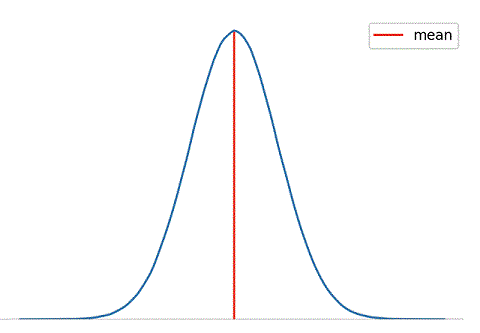

Now, let’s say we pick any <span style=color:blue>random value</span> from this distribution. The probability that we will pick values close to the mean is highest as it has the highest peak (due to high occurrence values in that region). We can clearly see that if we move away from the peak, the occurrence of the values decreases rapidly and so does the corresponding probability, towards a very small value close to zero.

So why are we looking at a <span style=color:blue>Normal Distribution</span> ? Well, with respect to the normal distribution we discussed above, consider the way we define the p-value.

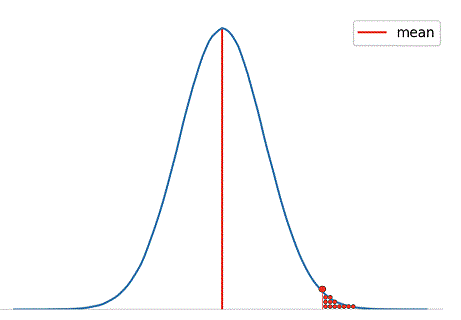

<span style=color:blue>p-value</span> is the <span style=color:blue>cumulative probability</span> ( <i>area under the curve</i> ) of the <i>values to the right of the <b>red point</b></i> in the figure above.

or 

<span style=color:blue>p-value</b> corresponding to the <b>red point</b> tells us about the ‘total probability’ of getting any value to the right hand side of the red point, when the values are picked randomly from the population distribution.

<b>P-value does not hold any value by itself</b>. A large p-value implies that sample scores are more aligned or similar to the population score.   

Now, you might have come across the thumb rule of comparing the p-value with the alpha value to draw conclusions. So let’s look into the alpha value.

#### <span style=color:gray>Statistical Significance of the p-value : <u>p-value $\:<\:$ Alpha value</u></span>

Recall that the <span style=color:blue>alpha value</span>, is also known as the significance level. This is a value that we know to be 0.05 or 5%.

We also know that p-value being less than alpha means that the results obtained are statistically significant. 

But what is the alpha value?

So, let’s spend a moment to look at what the alpha value signifies.

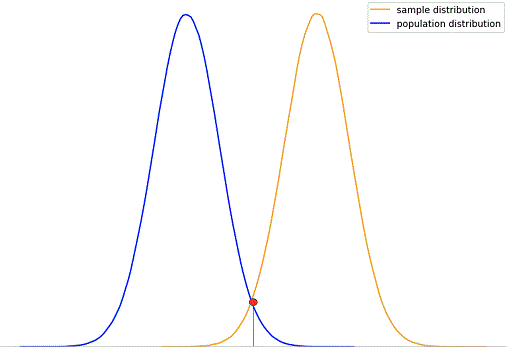

Alpha value is nothing but a <span style=color:blue>threshold p-value</span>, which the group conducting the test/experiment decides upon before conducting a test of similarity or significance <b>( Z-test or a T-test )</b>.

This means that if the likeliness of getting the sample score is less than alpha or the threshold p-value, we consider it significantly different from the population, or even belonging to some new sample distribution.

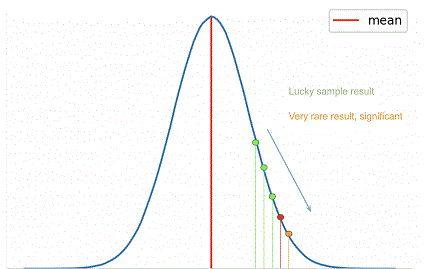

Consider the above normal distribution again. The red point in this distribution represents the alpha value or the threshold p-value. Now, let’s say that the green and orange points represent different sample results obtained after an experiment.   

We can see in the plot that the leftmost green point has a p-value greater than the alpha. As a result, these values can be obtained with fairly high probability and the sample results are regarded as lucky.

The point on the rightmost side (orange) has a p-value less than the alpha value (red). As a result, the sample results are a rare outcome and very unlikely to be lucky. Therefore, they are significantly different from the population.

The alpha value is decided depending on the test being performed. An alpha value of 0.05 is considered a good convention if we are not sure of what value to consider.

But this comes with an asterisk – the smaller the value of alpha we consider, the harder it is to consider the results as significant. Keep in mind that the alpha value will vary from experiment to experiment and there is no alpha value which can be considered as a thumb rule.

Let’s look at the relationship between the alpha value and the p-value closely.

#### <span style=color:gray><u>p-value $\:<\:$ alpha</u></span>

Consider the following population distribution:

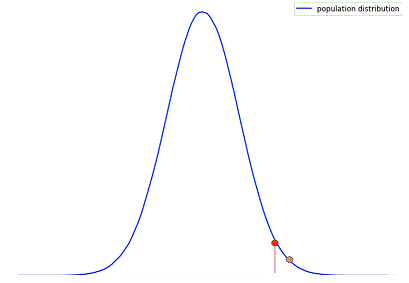

Here, the red point represents the alpha value, or the threshold p-value. We can clearly see that the area under the curve to the right of the threshold is very low.

The orange point represents the p-value using the sample population. In this case, we can clearly see that the p-value is less than the alpha value (the area to the right of the red point is larger than the area to the right of the orange point). This can be interpreted as:

<i>" The results obtained from the sample is an extremity of the population distribution (an extremely rare event), and hence there is a good chance it may belong to some other distribution" (as shown below).</i>

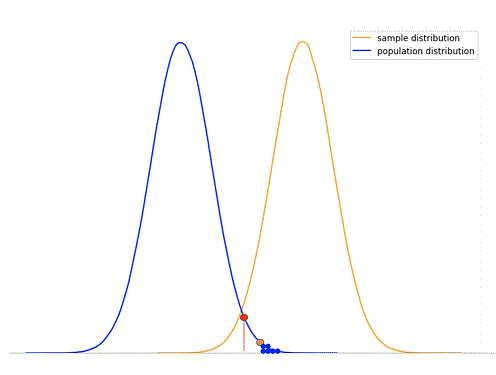

Considering our definitions of alpha and the p-value, we consider the sample results obtained as significantly different. We can clearly see that the p-value is far less than the alpha value.

#### <span style=color:gray><u>p-value $\:>\:$ alpha</u></span>

<span style=color:blue><b><u>p-value greater than the alpha</u></b></span> means that the results are in <b>favor</b> of the <span style=color:blue>Null Hypothesis $\:H_0\:$</span> and therefore <b>we fail to reject it</b>. This result is often against the <span style=color:blue>Alternative Hypothesis $\:H_A\:$</span> (obtained results are from another distribution) and the results obtained are not significant and simply a matter of chance or luck.

Again, consider the same <span style=color:blue>population distribution</span> curve with the red point as <span style=color:blue><b>alpha</b></span> and the orange point as the calculated <span style=color:blue><b>p-value</b></span> from the <span style=color:blue><b>sample</b>:

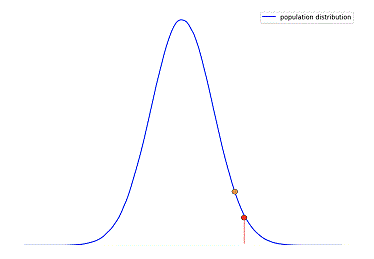

So, p-value > alpha (considering the area under the curve to the right-hand side of the red and the orange points) can be interpreted as follows:

<i>" The sample results are just a low probable event of the population distribution and are very likely to be obtained by luck."</i>

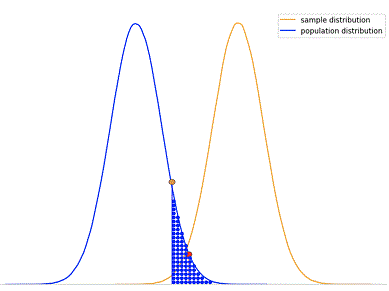

We can clearly see that the area under the population curve to the right of the orange point is much larger than the alpha value. This means that the obtained results are more likely to be part of the same population distribution than being a part of some other distribution.

Now that we have understood the interpretation of the p-value and the alpha value, let’s look at a classic example from the world of statistics.

### <span style=color:darkred>p-value One-sided and two-sided tests</span>

<div class="alert alert-warning alert-warning"><b><u>One-sided and two-sided tests</u></b>   
$%$   

- When you are interested in <b>checking</b> for an <b>increase or a decrease</b>, but <b>not both</b>, use a <b><u>one-sided test</u></b>   
$%$   
- When you are interested in <b>any difference</b> from the <b><u>null value</u></b> – an increase or decrease – then the test should be <b>two-sided test</b>   
$%$   
Switching a <b>two-sided test</b> to a <b>one-sided test</b> after observing the data is dangerous because it can inflate the <b>Type 1 Error rate</b>.

### <span style=color:darkred>p-value Example</span>

This is a classic example of a similarity test (Z-test in this case) where we want to check whether the sample is similar to the population or not.

In order to solve this, we will follow a step-by-step approach:

1. <span style=color:blue>Understand</span> the information given and <b>form</b> the <span style=color:blue>Null $H_0$</span> and <span style=color:blue>the Alternative $H_A$ hypothesis</span>.
2. <span style=color:blue>Calculate</span> the <b>Z-score</b> and <span style=color:blue>find and plot the area under the curve</span>.
3. <span style=color:blue>Calculate</span> the corresponding <b>p-value</b>
4. <span style=color:blue>Compare</span> the <b>p-value</b> and the <b>alpha value ($\alpha$)</b>
5. <span style=color:blue>Interpret</span> the <b>final results</b>.

#### <span style=color:gray><u>Step 1:</u> Understand the given information</span>

- $\mu$ = 74 (<i>Population Mean</i>)   
- $\sigma$ = 8 (<i>Population Standard Deviation</i>)   
- $\bar{x}$ = 78 (<i>Sample Mean</i>)   
- $n$ = 60 (<i>Sample Size</i>) 
- $alpha$ = 0.05

We know the <span style=color:blue>population mean</span>, <span style=color:blue>standard deviation</span> and the <span style=color:blue>sample size</span> is over <b>30</b>, which means we will be using the <span style=color:blue><b>Z-test</b></span>.

Form the two possible Hypothesis conditions :

- $(\:H_0\:)\:$ $=$ 74
- $(\:H_A\:)\:$ $\neq$ 74   
$%$    

#### <span style=color:gray><u>Step 2:</u> Calculating the Z-Score</span>

Calculate the <span style=color:blue>Standard Error $\:(\:SE_{\bar{x}}\:)$</span> using its equation :   
$%$   

\begin{align*}SE_{\bar{x}}\hspace{2mm}=\hspace{2mm}\frac{\sigma}{\sqrt{n}}\hspace{2mm}=\hspace{2mm}\frac{8}{\sqrt{60}}\hspace{2mm}=\hspace{2mm}1.033\end{align*}   
$%$   
Calculate the <span style=color:blue>Z-Score</span> using the Z-score equation :   
$%$   
\begin{align*}Z\:=\: \frac{Point\:Estimate\: - \:Null\:Value}{SE_{Point\:Estimate}}\:=\: \frac{\:\bar{x}\: - \:Null\:Value}{SE_{\bar{x}}}\:=\:\frac{\:78\: - \:74\:}{1.033}\:=\:3.87\end{align*}   
$%$   


<span style=color:blue><b>Z-Score</b></span> comes out to be <b>3.87</b>.

In [30]:
x = 78
mu = 74
sigma = 8
n = 60
alpha = 0.05
SE = (sigma/np.sqrt(n))

x_z_score = (x - mu) / SE
print('Standard Error (SE) of the Point Estimate = ',  round(SE, 3))
print('Z-score = ',  round(x_z_score, 3))
print('alpha value = ',  round(alpha, 3))

Standard Error (SE) of the Point Estimate =  1.033
Z-score =  3.873
alpha value =  0.05


In [31]:
from scipy.integrate import quad

def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

x_z_score

x_z_score_percentile, _ = quad(normalProbabilityDensity, np.NINF, x_z_score)
print(x_z_score)
print('Point Estimate Z-score Probability: ', round(x_z_score_percentile, 4))

3.8729833462074175
Point Estimate Z-score Probability:  0.9999


#### <span style=color:gray><u>Step 3:</u> Referring to the Z-table and finding the p-value:</span>

If we get look up the Z-table for <b>3.87</b>, we will get also a value of  <b>~0.999</b>. This is the <span style=color:blue>area under the curve</span> or <span style=color:blue>probability</span> under the <span style=color:blue><b>population distribution</b></span>.    

But this is the <span style=color:blue>probability</span> of what?

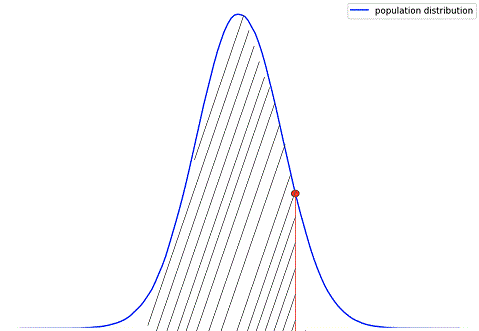

The <span style=color:blue>probability</span> obtained is to the left of the <span style=color:blue>Z-score</span> ( <span style=color:red><b><i>Red Dot</i></b></span> ). The value <b>0.999</b> represents the <span style=color:blue><u>“total probability”</u></span> of getting a result <span style=color:blue><i>“less than the <b>sample mean</b>, $\:\bar{x}\:$ = 78”</i></span>, with respect to the population distribution.

The <span style=color:red>red dot</span> points where the <span style=color:blue><b>sample mean</b>, $\:\bar{x}\:$ = 78</span> lies with respect to the population distribution. But we have studied earlier that <span style=color:blue><b>p-value</b></span> is to the <b>right-hand side</b> of the <span style=color:red>red dot</span>, so how do we get the <span style=color:blue><b>p-value</b></span> ?

We already know, that the total area under the <span style=color:blue><b>Normal distribution</b></span> is <b>1</b>.   

Therefore, the area to the right of <span style=color:blue>Z-score</span> is the <span style=color:blue><b><u>p-value</u></b></span>, represented by the unshaded region.

So, how do we calculate the <span style=color:blue><b><u>p-value</u></b></span> ? :   
$%$   
<center><span style=color:blue><b>p-value</b></span> = 1 – 0.999</center>   
$%$   
<center><span style=color:blue><b>p-value</b></span> = 0.001</center>   

<b>0.001</b> (<span style=color:blue><b>p-value</b></span>) is the unshaded area to the right of the <span style=color:red>red dot</span>. 

The <b>value 0.001</b> represents the <span style=color:blue><u>"total probability"</u></span> of getting a result <span style=color:blue><i>"greater than the <b>sample mean</b>, $\:\bar{x}\:$ = 78"</i></span>, with respect to the population distribution.

In [ ]:
p_value = (1 - x_z_score_percentile)
print('p-value = ', round(p_value, 4))

#### <span style=color:gray><u>Step 4</u> : <u>Conclusion of the hypothesis test</u> - <i>Comparing p-value and alpha value :</i></span>

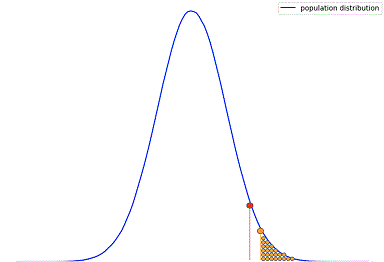

Checking the <span style=color:blue>Hypothesis Test</span> :

In [ ]:
alpha
print('p-value ', round(p_value, 4), '<', round(alpha, 4), 'alpha value')

We can clearly see in the plot above, that the <span style=color:blue>p-value</span> is far less than the <span style=color:blue>alpha value</span>:   
$%$   
<center>0.001 (<span style=color:red>red region</span>) < 0.5 (<span style=color:orange>orange region</span>)</center>   

Recal the rule :

- A <span style=color:blue><b><u>small p-value$\:$ ≤$\:$ 0.05</u></b></span> indicates <b>strong evidence against</b> the <span style=color:blue>null hypothesis $H_0$</span>, so you <u>reject</u> the <span style=color:blue>null hypothesis $H_0$</span>.   
$%$   
- A <span style=color:blue><b><u>large p-value$\:$ >$\:$ 0.05</u></b></span> indicates <b>weak evidence against</b> the <span style=color:blue>null hypothesis $H_0$</span>, so you <u>fail to reject</u> the <span style=color:blue>null hypothesis $H_0$</span>.   
$%$   
Since the <span style=color:blue>p-value (0.0001)</span> is <b>lower than</b> the <span style=color:blue>standard confidence level, alpha = 0.05</span>, we can <b>reject</b> the <span style=color:blue>Null hypothesis</span> that the <b>Sample mean</b> is equal to <b>74</b>, the <span style=color:blue>Null Hypothesis</span> $\:H_0\::$ $\:\mu = 74$. 

There is <b>strong evidence</b> in support for the <span style=color:blue>alternative hypothesis</span> that the <b>Sample mean</b>, in fact, is different from <b>74</b>. <span style=color:blue>Alternative Hypothesis</span> $\:H_A\::$ $\:\mu \neq 74$.   

<div class="alert alert-warning alert-warning"><b><u>p-value as a tool in hypothesis testing</u></b>   
$%$   

- The <b>smaller the p-value</b>, the <b><i>stronger the data favor $\:H_A\:$ over $\:H_0\:$</i></b>.   
$%$   
- A <b>small p-value</b> (usually <b>$<$ 0.05</b>) corresponds to <i><u>sufficient evidence</u></i> <b>to reject</b> $\:H_0\:$ in <b>favor</b> of $\:H_A\:$.</div>

### <span style=color:darkred>Reviewing the process of evaluating Hypothesis Tests with p-values</span>   
$%$   
- The <span style=color:blue>null hypothesis</span> represents a skeptic’s position or a position of no difference, <u>equality</u>. We <b>reject</b> this position only if the <b>evidence strongly favors</b> $\:H_A$.   
$%$   
- A <span style=color:blue>small p-value</span> means that if the <span style=color:blue><b>null hypothesis is true</b></span>, there is a <span style=color:blue>low probability</span> of seeing a <b>point estimate</b> at least as <b>extreme</b> as the one we saw. We <b>interpret</b> this as <span style=color:blue><b>strong evidence in favor of the alternative</b></span>.   
$%$   
- We <b>reject</b> the <span style=color:blue>null hypothesis</span> if the <span style=color:blue><b>p-value</b></span> is <b>smaller than</b> the <span style=color:blue><u>significance level</u>, ($\:\alpha\:$)</span>, which is usually <b>0.05</b>. Otherwise, we <b>fail to reject</b> $\:H_0$.   
$%$   
- We should always <b>state the conclusion</b> of the <span style=color:blue>hypothesis test</span> in plain language so non-statisticians can also understand the results.   
$%$   

The <span style=color:blue><b>p-value</b></span> is constructed in such a way that we can directly <b>compare</b> it to the <span style=color:blue><u>significance level</u>, ($\:\alpha\:$)</span> <i>to determine whether or not to</i> <b>reject</b> $\:H_0$. This method ensures that the <span style=color:blue><b><u>Type 1 Error rate</u></b></span> does not exceed the <span style=color:blue>significance level standard</span>.</span>

---

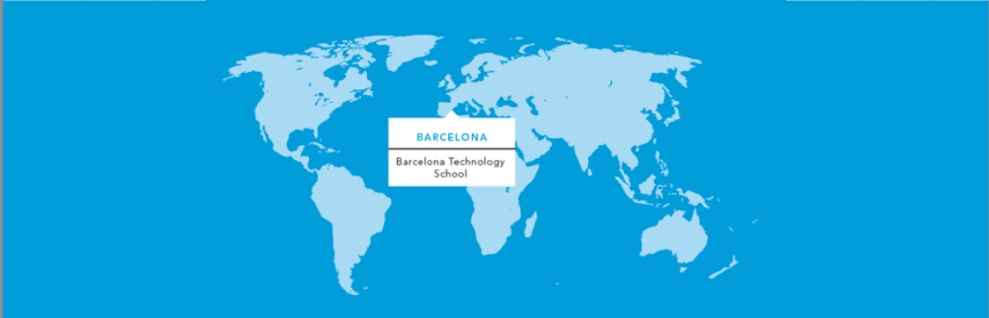